In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.0.0


## Datensatz importieren

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

## Klassen festlegen und Train/Kontoll Split aufbauen

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
#zeigt Anzahl der Labels an -> entspricht hier der Anzahl der Bilder, also ist jedes Bild gelabelt
len(train_labels)

60000

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

## Bilder vorbereiten

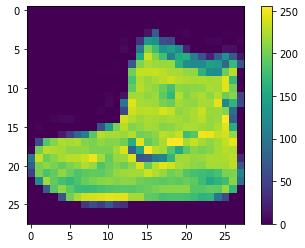

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
#Skalierung auf Wert zwischen 0 und 1 -> 255, da Wertebereich in diesem Fall bis max. 255 (siehe Bild Zelle darüber)
train_images = train_images / 255.0

test_images = test_images / 255.0

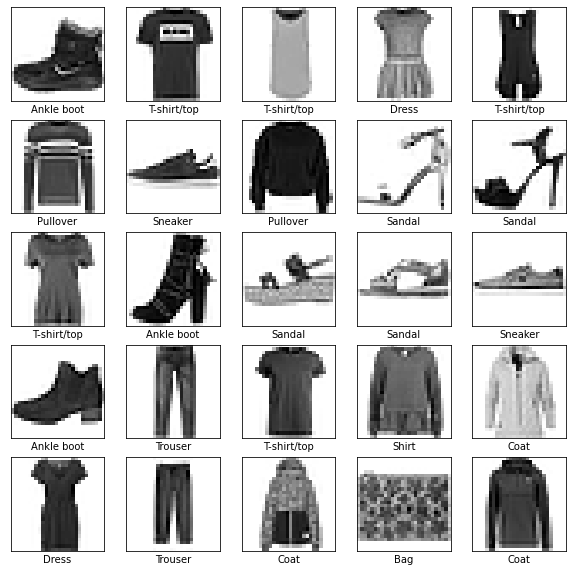

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Modell bauen

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.5022 - accuracy: 0.8252
Epoch 2/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.3785 - accuracy: 0.8649
Epoch 3/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.3387 - accuracy: 0.8769
Epoch 4/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.3180 - accuracy: 0.8835
Epoch 5/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.2994 - accuracy: 0.8894
Epoch 6/10
60000/60000 [==============================] - 6s 104us/sample - loss: 0.2827 - accuracy: 0.8953
Epoch 7/10
60000/60000 [==============================] - 6s 102us/sample - loss: 0.2710 - accuracy: 0.8991
Epoch 8/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.2587 - accuracy: 0.9040
Epoch 9/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.2486 - accuracy: 0.9063
Epoch 10

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 1s - loss: 0.2198 - accuracy: 0.8839

Test accuracy: 0.8839


# Predict

In [16]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [17]:
predictions = probability_model.predict(test_images)

In [18]:
predictions[0]

array([2.1027711e-07, 1.0238967e-10, 2.7735647e-09, 1.4997186e-11,
       2.8580740e-08, 1.8252215e-03, 2.1715447e-07, 4.4702306e-02,
       2.1421107e-07, 9.5347184e-01], dtype=float32)

### grafische Darstellung

In [20]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

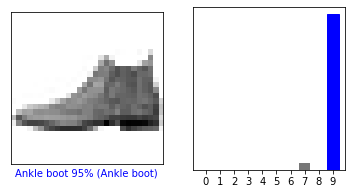

In [21]:
# Bild 0 aus dem Bild-Datensatz
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

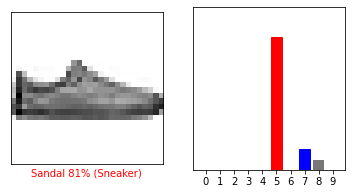

In [22]:
# Bild 13 aus dem Bild-Datensatz
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


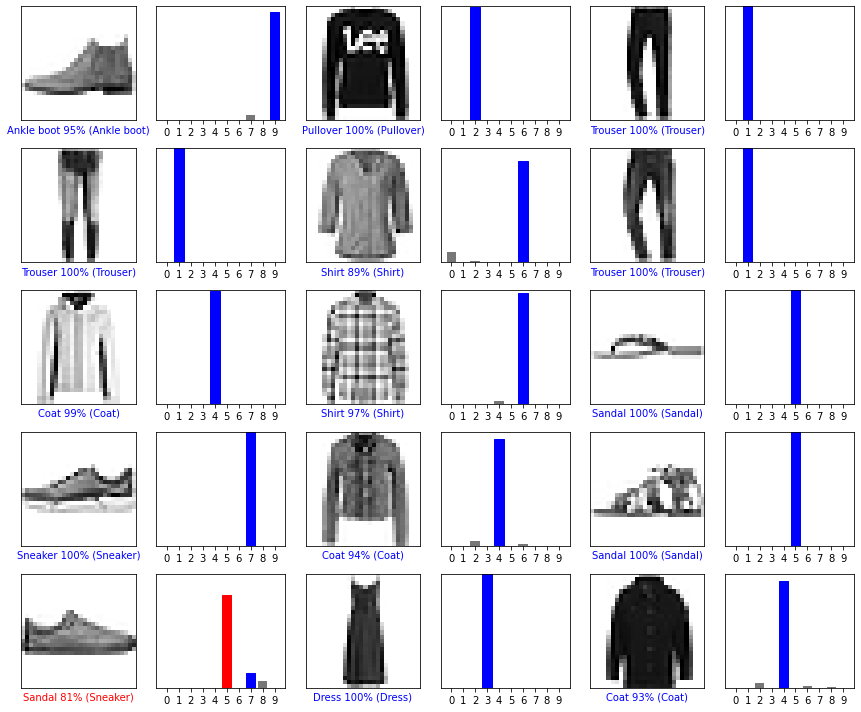

In [23]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Verwendung des Modells für einzelnen Bilder

In [24]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [25]:
# Add the image to a batch where it's the only member.
# Optimiert immer ganze Batches vorherzusagen, deshalb auch bei einzelnen Bildern in einen Batch mit einem 
# einzelnen Bild integrieren
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [26]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[3.6227328e-05 2.5541750e-12 9.9586856e-01 1.7013943e-10 3.9375680e-03
  6.7385937e-11 1.5771111e-04 3.1975636e-18 2.7376862e-08 1.4153336e-15]]


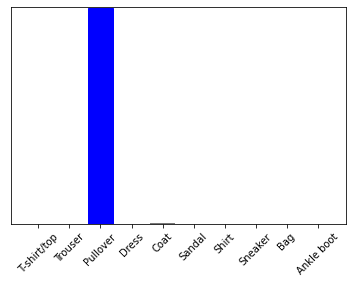

In [27]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [29]:
# Rückgabe der Vorhersagen -> Liste von Listen
# für jedes Bild wird eine eingene Liste zurückgegeben
# Hier Liste für Vorhersage für das erste Bild
np.argmax(predictions_single[0])

# -> Zahl die Zurcükgegeben wird entspricht dem Label (siehe Liste "class_names")

2